**Import required libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


**Import MNIST fashion dataset**

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Making labels for each class**

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']

In [ ]:
class_names[0]

'T-shirt/top'

**Explore the data**

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

**Preprocess the data**

Visualize the input data
(the first one)

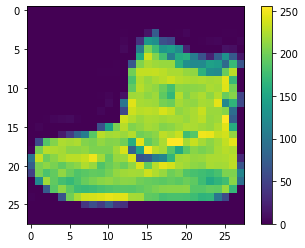

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

*Image normalization*

Scale values to a range of 0 to 1

In [ ]:
train_images = train_images/255.0

test_images = test_images/255.0

**Visualize the first 25 data before feeding to the network**

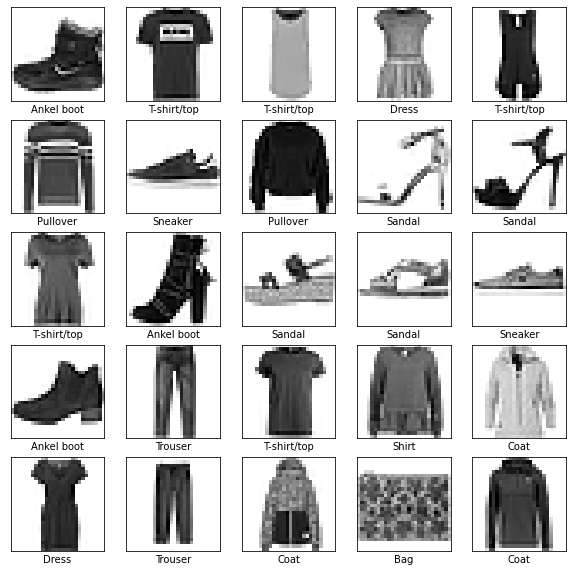

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**Start build a model**

normal neural network

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Compile the model**

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

**Train the model**

In [ ]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3474 - accuracy: 0.8733
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3254 - accuracy: 0.8807
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8846
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3010 - accuracy: 0.8879
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2895 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2762 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2681 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2600 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2528 - accuracy: 0.9052
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.246

**Evaluate Accuracy**



In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)

print('\n Test accuracy: ',test_acc)

313/313 - 0s - loss: 0.3334 - accuracy: 0.8835

 Test accuracy:  0.8834999799728394


**Make Predictions**

In [ ]:
probability_model = tf.keras.Sequential([
                                         model,
                                         tf.keras.layers.Softmax()
])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([1.1812762e-10, 9.1170592e-11, 2.1755099e-11, 3.4299830e-10,
       3.3822091e-13, 1.2824909e-03, 8.0448100e-11, 4.3967210e-02,
       2.0067358e-08, 9.5475030e-01], dtype=float32)

*A prediction is an array of 10 numbers. They represent the probabiliy corresponds to the 10 different classes.*

In [ ]:
np.argmax(predictions[0])

9

9th array (ankle boot)

In [ ]:
test_labels[0]

9

**Graph this to look at the full set of 10 class predictions**

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**Verify Prediction**

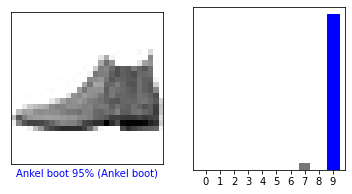

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

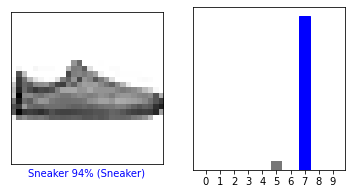

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

**Plot serveral images with their predictions**

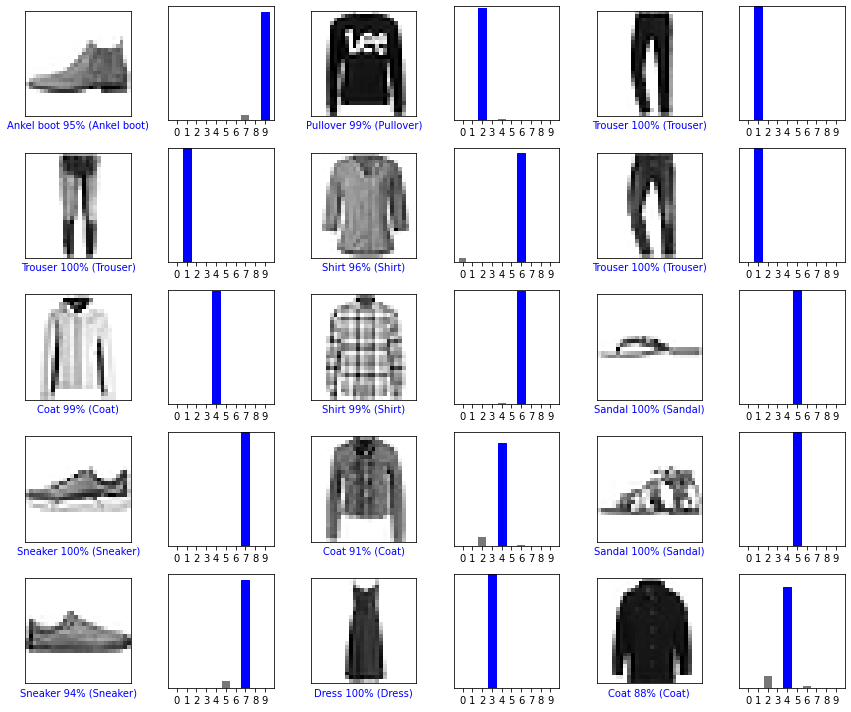

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Use the train model**

In [ ]:
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
img  = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.0057169e-05 2.5814894e-13 9.8985624e-01 1.3878811e-09 8.6947326e-03
  1.0634683e-16 1.4289923e-03 1.6136264e-27 4.7635104e-11 1.8832697e-20]]


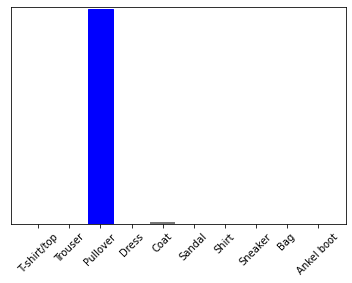

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2